In [40]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


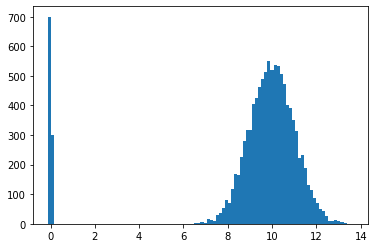

In [41]:
mu, sigma = 10, 1

data = np.random.normal(mu, sigma, 10000)
data = np.append(data, np.random.uniform(-0.1, 0.1, 1000))
data = data.reshape((-1, 1))


plt.hist(data, bins=100)
plt.show()


In [50]:
tf.reset_default_graph()

x_pl = tf.placeholder(shape=(None, 1), dtype=float)

mu_var = tf.get_variable(name='mu1', shape=[1], dtype=tf.float32, initializer=tf.ones_initializer)
sigma_var = tf.get_variable(name='sigma1', shape=[1], dtype=tf.float32, initializer=tf.ones_initializer)

init_kernel = tf.contrib.layers.xavier_initializer()

with tf.variable_scope('layer1'):
    net = tf.layers.dense(x_pl,
                          units=16,
                          kernel_initializer=init_kernel,
                          name='fc')
    net = tf.nn.relu(net)

with tf.variable_scope('layer_2'):
    net = tf.layers.dense(net,
                          units=1,
                          kernel_initializer=init_kernel,
                          name='fc')
    net = tf.nn.tanh(net)

dist_delta = tf.distributions.Uniform(-0.1,0.1)
dist_normal = tf.distributions.Normal(loc=mu_var, scale=sigma_var)

out = tf.where(net < 0, dist_delta.sample((data.shape[0],1)), dist_normal.sample(data.shape[0]))

loss = tf.nn.(labels=data, predictions=out)

optimizer = tf.train.GradientDescentOptimizer(0.00001)
train = optimizer.minimize(loss)

with tf.Session() as sess:
    
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for i in range(100000):
        _, loss_value, mu_res, sigma_res = sess.run((train, loss, mu_var, sigma_var), feed_dict={x_pl: data})
        
        if i%1000==0:
            print(loss_value, mu_res, sigma_res)

TypeError: l2_loss() got an unexpected keyword argument 'labels'